<a href="https://colab.research.google.com/github/Yasir323/Electrical-Fault-detection-and-classification/blob/main/Fault_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Kaggle Link: https://www.kaggle.com/esathyaprakash/electrical-fault-detection-and-classification

There is existing baseline on this dataset, reporting   accuracy. Paper at this link : https://springerplus.springeropen.com/articles/10.1186/s40064-015-1080-x

The Github Repo having matlab model file: https://github.com/KingArthur000/Electrical-Fault-detection-and-classification

# Setup (Importings)

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

Either upload the data for each session, or data is available at this [link](https://drive.google.com/drive/folders/1OxTxUhwNWJQqJZL4I4Tg5P-5sBUVT6nD?usp=sharing) of my drive. You may shortcut the data file path in your drive, and then mount the drive to read data.

# Data Preprocessing and EDA

In [2]:
# df = pd.read_csv('/content/drive/MyDrive/DataSets/FaultClassification/classData.csv')
# df.head()

In [3]:
!wget -O fault_classification.csv https://raw.githubusercontent.com/Yasir323/Electrical-Fault-detection-and-classification/main/classData.csv

--2021-09-04 11:55:01--  https://raw.githubusercontent.com/Yasir323/Electrical-Fault-detection-and-classification/main/classData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655029 (640K) [text/plain]
Saving to: ‘fault_classification.csv’

fault_classificatio 100%[===================>] 639.68K  --.-KB/s    in 0.03s   

2021-09-04 11:55:02 (22.6 MB/s) - ‘fault_classification.csv’ saved [655029/655029]



In [4]:
!wget -O fault_detection.csv https://raw.githubusercontent.com/Yasir323/Electrical-Fault-detection-and-classification/main/detect_dataset.csv

--2021-09-04 11:55:02--  https://raw.githubusercontent.com/Yasir323/Electrical-Fault-detection-and-classification/main/detect_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 940093 (918K) [text/plain]
Saving to: ‘fault_detection.csv’

fault_detection.csv 100%[===================>] 918.06K  --.-KB/s    in 0.04s   

2021-09-04 11:55:02 (23.3 MB/s) - ‘fault_detection.csv’ saved [940093/940093]



In [5]:
raw_df = pd.read_csv('fault_classification.csv')

In [6]:
raw_df.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
7096,0,0,0,0,-41.381476,2.186933,36.108541,0.423758,-0.562913,0.139154
1405,1,0,1,1,711.665203,70.717967,43.417732,0.037775,-0.375939,0.338163
994,1,0,0,1,688.790440,70.621382,-29.547416,-0.280690,0.187978,0.092712
2024,1,0,1,1,-531.632626,-329.339172,-52.712341,-0.041722,0.365712,-0.323989
5620,0,0,0,0,55.236315,-3.679429,-52.902664,0.214181,0.392834,-0.607015
1746,1,0,1,1,829.548244,-666.329545,-4.414516,0.007239,-0.208240,0.201001
2523,0,1,1,0,-68.077848,551.714745,-481.140563,-0.233554,-0.032399,0.265952
3078,0,1,1,0,50.401311,-50.711921,2.917205,0.463390,0.042370,-0.505759
4294,0,1,1,1,744.379531,-682.627109,-59.702375,0.013663,-0.272106,0.258443
1721,1,0,1,1,664.453970,-841.350039,-26.126331,-0.009282,-0.072336,0.081618


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [8]:
raw_df.G.value_counts()

0    4465
1    3396
Name: G, dtype: int64

In [9]:
raw_df.A.value_counts()

1    4492
0    3369
Name: A, dtype: int64

In [10]:
raw_df.B.value_counts()

1    4367
0    3494
Name: B, dtype: int64

In [11]:
raw_df.C.value_counts()

0    4628
1    3233
Name: C, dtype: int64

In [12]:
df = raw_df.copy()

In [13]:
def make_target_column(x):
    if not(x.G or x.A or x.B or x.C):
        return "No Fault"
    elif x.A and x.G and not (x.B or x.C):
        return "LG"
    elif x.B and x.C and not (x.A or x.G):
        return "LL"
    elif x.A and x.G and x.B and not (x.C):
        return "LLG"
    elif x.A and x.C and x.B and not(x.G):
        return "LLL"
    elif x.A and x.G and x.B and x.C:
        return "LLLG"

In [14]:
df['Fault type'] = df.apply(make_target_column, axis=1)
df['Fault type'].value_counts()

No Fault    2365
LLG         1134
LLLG        1133
LG          1129
LLL         1096
LL          1004
Name: Fault type, dtype: int64

In [15]:
# df['No Fault'] = df.apply(lambda row: 1 if not(row.G or row.A or row.B or row.C) else 0, axis=1)
# df['No Fault'].value_counts()

In [16]:
# df['LG'] = df.apply(lambda row: 1 if row.A and row.G and not (row.B or row.C) else 0, axis=1)
# df.LG.value_counts()

In [17]:
# df['LL'] = df.apply(lambda row: 1 if row.B and row.C and not (row.A or row.G) else 0, axis=1)
# df.LL.value_counts()

In [18]:
# df['LLG'] = df.apply(lambda row: 1 if row.A and row.G and row.B and not (row.C) else 0, axis=1)
# df.LLG.value_counts()

In [19]:
# df['LLL'] = df.apply(lambda row: 1 if row.A and row.C and row.B and not(row.G) else 0, axis=1)
# df.LLL.value_counts()

In [20]:
# df['LLLG'] = df.apply(lambda row: 1 if row.A and row.G and row.B and row.C else 0, axis=1)
# df.LLLG.value_counts()

In [21]:
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG


In [22]:
df.drop(['G', 'A', 'B', 'C'], axis=1, inplace=True)
df.sample(10)

,Ia,Ib,Ic,Va,Vb,Vc,Fault type
950,183.835458,57.521477,-48.422092,-0.382138,0.512008,-0.129870,LG
5546,19.196615,-23.253165,17.604512,0.594598,-0.269651,-0.324947,No Fault
5733,-11.131462,92.792918,-85.039566,-0.610483,0.415944,0.194539,No Fault
5912,-27.881491,-6.830286,31.255649,0.512902,-0.500464,-0.012438,No Fault
1015,827.929057,65.235091,-14.917187,-0.181270,-0.008740,0.190010,LG
4871,-385.880640,-495.640396,881.518786,-0.042362,0.020093,0.022269,LLLG
5638,55.132023,11.509494,-68.770202,0.049057,0.511790,-0.560847,No Fault
4787,-865.799124,585.187136,280.609812,-0.011805,0.041166,-0.029361,LLLG
3494,875.728512,-555.769976,-317.814630,0.013841,-0.041669,0.027828,LLL
903,-441.725154,14.775926,-44.010409,-0.297160,0.596760,-0.299600,LG


# Model Buildings

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [24]:
X = df.drop(['Fault type'], axis=1)
y = df['Fault type']
X.shape, y.shape

((7861, 6), (7861,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6288, 6), (1573, 6), (6288,), (1573,))

In [27]:
clf = SGDClassifier(loss='log', random_state=42)

In [28]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [29]:
pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, pred)

0.36745073108709475

### Feature Engineering Required or we need to go for Deep Neural Networks, but data is not enough in either case.

In [32]:
# df['BalancedCurrent'] = df['Ia'] + df['Ib'] + df['Ic']
df['BalancedCurrent'] = df.apply(lambda x: 1 if (x.Ia+x.Ib+x.Ic) < 20 else 0, axis=1)
df['Ib-Ic'] = df['Ib'] - df['Ic']
df['Ib+Ic'] = df['Ib'] + df['Ic']
df.sample(10)

,Ia,Ib,Ic,Va,Vb,Vc,Fault type,BalancedCurrent,Ib-Ic,Ib+Ic
3798,-79.313717,-721.504827,802.900723,-0.039165,0.005596,0.033569,LLL,1,-1524.405551,81.395896
5096,52.396869,737.439845,-789.838978,0.038591,-0.004201,-0.034390,LLLG,1,1527.278823,-52.399133
1285,268.303272,-880.808098,-49.653465,-0.028730,0.136161,-0.107431,LLG,1,-831.154633,-930.461563
2378,21.182016,-788.485522,769.869261,-0.195682,-0.000993,0.196675,LL,1,-1558.354783,-18.616261
2784,15.975294,-765.665452,752.141424,-0.239255,-0.003711,0.242966,LL,1,-1517.806875,-13.524028
7693,27.962460,58.154620,-89.031010,-0.428825,0.607450,-0.178625,No Fault,1,147.185630,-30.876391
966,391.527315,65.975364,-43.872307,-0.364767,0.415345,-0.050578,LG,0,109.847671,22.103057
2127,714.542131,-810.324142,-21.160143,-0.005352,-0.106790,0.112142,LLG,1,-789.163998,-831.484285
259,824.804438,32.744243,18.879376,0.075245,-0.392920,0.317675,LG,0,13.864867,51.623618
2434,-32.678780,-453.223622,488.351529,-0.486036,-0.032747,0.518783,LL,1,-941.575151,35.127907


In [33]:
df.describe()

,Ia,Ib,Ic,Va,Vb,Vc,BalancedCurrent,Ib-Ic,Ib+Ic
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515,0.843404,-79.237663,-10.452874
std,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897,0.363442,709.167021,398.043228
min,-883.542316,-900.526952,-883.357762,-0.620748,-0.608016,-0.612709,0.000000,-1561.178824,-943.555660
25%,-119.802518,-271.845946,-61.034219,-0.130287,-0.159507,-0.215977,1.000000,-438.781849,-54.135738
50%,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281,1.000000,5.079388,1.744378
75%,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973,1.000000,154.072626,62.981129
max,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179,1.000000,1530.242698,932.232368


In [34]:
df.groupby(['Fault type']).describe()

Ia                         ...       Ib+Ic                        
             count       mean         std  ...         50%         75%         max
Fault type                                 ...                                    
LG          1129.0  35.626301  616.329665  ...    4.475588   40.243356   76.122711
LL          1004.0  -1.587148   44.518645  ...    0.559857   47.452374   72.503189
LLG         1134.0  35.926002  610.722486  ... -102.334268  423.284720  932.232368
LLL         1096.0   5.458992  606.880540  ...  -30.044596  609.120734  884.927706
LLLG        1133.0  35.647495  618.770185  ...   22.433165  592.309285  883.540053
No Fault    2365.0  -7.559426   45.265969  ...    3.557788   49.294412   69.195931

[6 rows x 72 columns]

Now let's try the model

In [35]:
X = df.drop(['Fault type'], axis=1)
y = df['Fault type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [36]:
accuracy_score(y_test, pred)

0.4291163382072473

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

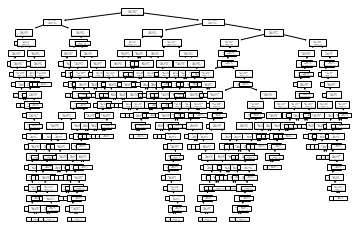

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(tree_clf)
plt.show()

In [39]:
from sklearn.tree import export_graphviz
import graphviz

In [40]:
dot_data = tree.export_graphviz(
        tree_clf,
        out_file="tree.dot",
        feature_names=X_train.columns,
        class_names="Fault type",
        rounded=True,
        filled=True
)

In [41]:
!dot -Tpng tree.dot -o tree.png

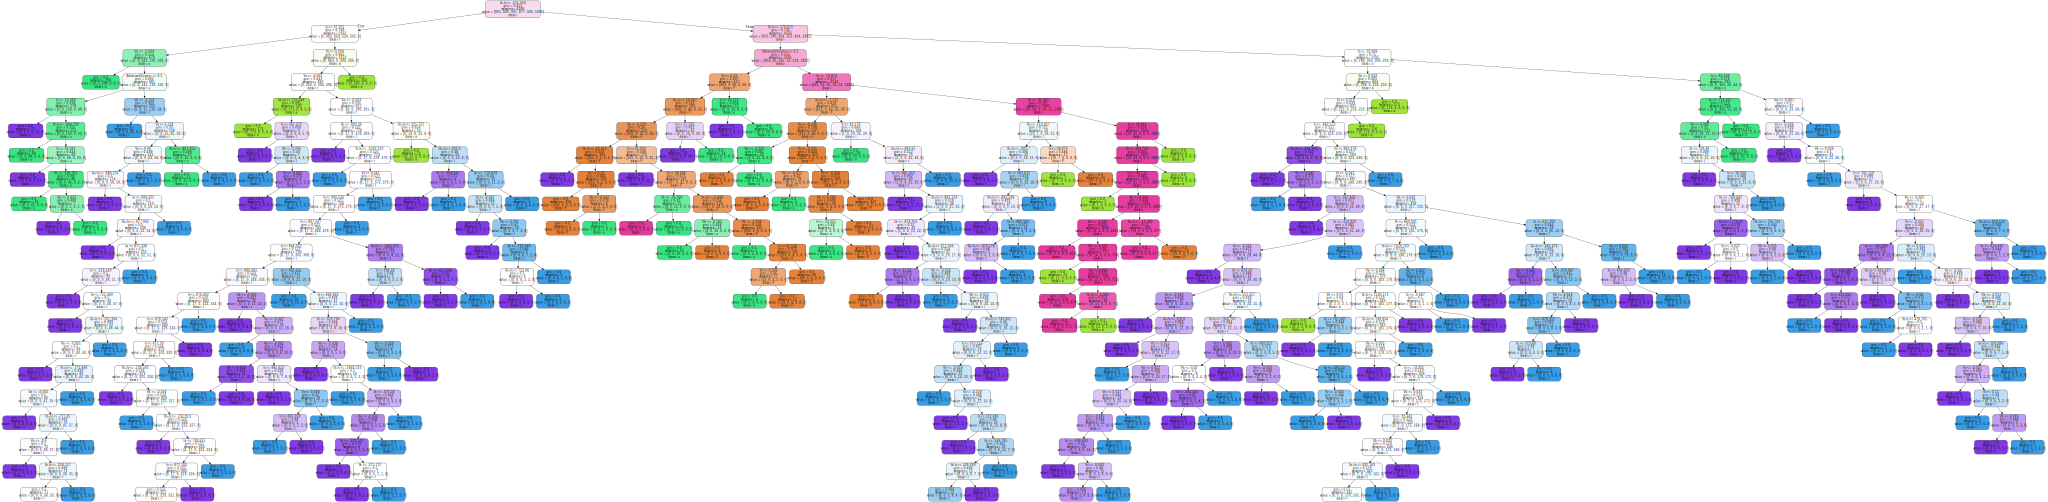

In [42]:
graph = graphviz.Source.from_file("tree.dot")
graph

In [43]:
tree_pred = tree_clf.predict(X_test)

In [44]:
accuracy_score(y_test, tree_pred)

0.866497139224412